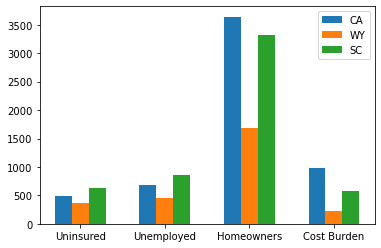

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
    
def openFile(fileName):
    fileRead = pd.read_csv(fileName)
    fileRead = fileRead.dropna() # Removes empty cells
    return fileRead

def getStateData(fileName):
    valuesState = []
    readState = openFile(fileName)
    state2022 = readState.loc[readState["State"] == "2022"]
    
    totalUninsuredState = 0
    for cell in state2022["Unnamed: 4"]: # % Uninsured
        totalUninsuredState += int(cell)
    valuesState.append(totalUninsuredState)
    
    totalUnemployedState = 0
    for cell in state2022["Unnamed: 11"]: # % Unemployed
        totalUnemployedState += int(cell)
    valuesState.append(totalUnemployedState)
    
    totalHomeownersState = 0
    for cell in state2022["Unnamed: 28"]: # % Homeownership
        totalHomeownersState += int(cell)
    valuesState.append(totalHomeownersState)
    
    totalCostBurdenState = 0
    for cell in state2022["Unnamed: 32"]: # % Housing cost burden
        totalCostBurdenState += int(cell)
    valuesState.append(totalCostBurdenState)
    
    return valuesState

def interpret2022Data():
    pd.set_option('display.max_rows', None) # Allows for all rows to be printed
    axisLabels = ["Uninsured", "Unemployed", "Homeowners", "Cost Burden"]
    valuesCA = getStateData("California.csv")
    valuesWY = getStateData("Wyoming.csv")
    valuesSC = getStateData("SouthCarolina.csv")
        
    xvalue = np.arange(4)
    w = 0.2
    ax = plt.subplot(111)
    california = ax.bar(xvalue-0.2, valuesCA, width = w, align='center')
    wyoming = ax.bar(xvalue, valuesWY, width = w, align='center')
    southCarolina = ax.bar(xvalue+0.2, valuesSC, width = w, align='center')
    plt.xticks(xvalue, axisLabels)
    ax.legend((california[0], wyoming[0], southCarolina[0]), ('CA', 'WY', 'SC'))
    plt.title("Percentage of ")
    plt.show()
    
interpret2022Data()
# TODO: Do different years also make scatterplots/clusters/historgrams
# Change frame of data to what is established in 'Project Data.csv'